In [1]:
cd("/home/jm2386/Active_Lattice/")
using DrWatson
@quickactivate "Active_Lattice"
include("/home/jm2386/Active_Lattice/src/pm_pdes.jl");
include("/home/jm2386/Active_Lattice/src/pm_sims.jl");
include("/home/jm2386/Active_Lattice/src/pm_plot.jl");
include("/home/jm2386/Active_Lattice/src/Hetrocline.jl");


v3.0
v4.0


In [7]:
# load spinodal
Δϕ = 0.001
Pe = 7.5
file_name = "/store/DAMTP/jm2386/Active_Lattice/data/pm_pdes_pro/spinodal/Δϕ=$(Δϕ)_Pe=$(Pe).jld2"
            data = load(file_name)
            @unpack ϕas_left, ϕas_right, ϕps = data
            nϕps = [z for (x,y,z) in zip(ϕas_left,ϕas_right,ϕps) if (y>0.5)|(z > 0.2) ]
            nϕas_right = [y for (x,y,z) in zip(ϕas_left,ϕas_right,ϕps) if (y>0.5)|(z > 0.2) ]
            nϕas_left = [x for (x,y,z) in zip(ϕas_left,ϕas_right,ϕps) if (y>0.5)|(z > 0.2) ]
ϕas_left, ϕas_right, ϕps = nϕas_left, nϕas_right, nϕps

([0.45491486621961336, 0.4551456127295905, 0.45537739568691954, 0.4556102418670632, 0.4558441544020089, 0.4560791432830329, 0.4563152183521896, 0.45655239011827947, 0.456790664145801, 0.4570300549025119  …  0.39360218703747996, 0.39468225959813813, 0.3958704934809885, 0.39718926204955013, 0.3986697827873908, 0.4003581981851106, 0.40232813701827, 0.4047102384883977, 0.4077853385216248, 0.4124715269812998], [0.9220502168944901, 0.9208702878611552, 0.9196893686051384, 0.9185074648469853, 0.9173245651194006, 0.9161406632952254, 0.9149557456034344, 0.9137697993135232, 0.9125828303062447, 0.9113948119610515  …  0.46086163196071034, 0.45831417592469653, 0.4556593108987803, 0.45287379774049136, 0.4499268063419979, 0.4467722702119147, 0.44333556156709975, 0.4394878318938576, 0.4349466631804559, 0.42879381431281677], [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01  …  0.36, 0.361, 0.362, 0.363, 0.364, 0.365, 0.366, 0.367, 0.368, 0.369])

In [13]:
ϕa_grid = collect((ϕas_left[end]+Δϕ):Δϕ:(ϕas_right[end]-Δϕ))

Float64[]

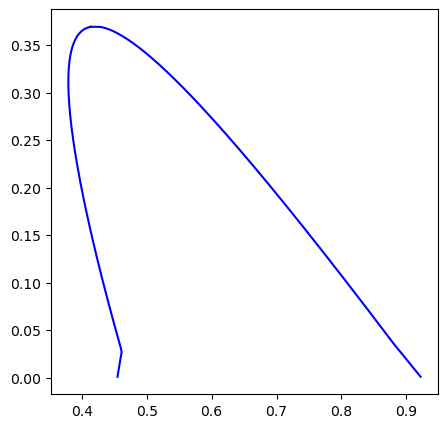

In [78]:
using PyPlot
fig, ax = subplots(1,1,figsize=(5,5))
ax.plot(ϕas_left, ϕps, color = "blue", label = "Spindoal", linestyle = "-")
                ax.plot(ϕas_right, ϕps, color = "blue", label = "_Spindoal", linestyle = "-")
                # ax.plot([ϕas_left[end],ϕas_right[end]], [ϕps[end],ϕps[end]], color = "blue", label = "_Spindoal", linestyle = "-")
display(fig)

In [20]:
file_name = "/store/DAMTP/jm2386/Active_Lattice/data/pm_pdes_pro/spinodal/Δϕ=$(Δϕ)_Pe=$(Pe).jld2"
            data = Dict{String,Any}()
            @pack! data = ϕas_left, ϕas_right, ϕps
            safesave(file_name,data)
            println("saved: ","Δϕ=$(Δϕ)_Pe=$(Pe)")
            return ϕas_left, ϕas_right, ϕps

saved: Δϕ=0.001_Pe=7.5


([0.45491486621961336, 0.4551456127295905, 0.45537739568691954, 0.4556102418670632, 0.4558441544020089, 0.4560791432830329, 0.4563152183521896, 0.45655239011827947, 0.456790664145801, 0.4570300549025119  …  0.39468225959813813, 0.3958704934809885, 0.39718926204955013, 0.3986697827873908, 0.4003581981851106, 0.40232813701827, 0.4047102384883977, 0.4077853385216248, 0.4124715269812998, 0.41347156548005776], [0.9220502168944901, 0.9208702878611552, 0.9196893686051384, 0.9185074648469853, 0.9173245651194006, 0.9161406632952254, 0.9149557456034344, 0.9137697993135232, 0.9125828303062447, 0.9113948119610515  …  0.45831417592469653, 0.4556593108987803, 0.45287379774049136, 0.4499268063419979, 0.4467722702119147, 0.44333556156709975, 0.4394878318938576, 0.4349466631804559, 0.42879381431281677, 0.41347301091337785], [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01  …  0.361, 0.362, 0.363, 0.364, 0.365, 0.366, 0.367, 0.368, 0.369, 0.3691427516532135])

In [75]:
function is_complex_value(ϕa, ϕp; Pe = 10.) # positive implies complex
    ϕ  = ϕa + ϕp
    # get extreme values 
    f(x) = Dw(ϕ, ϕa, Pe, x, ds(ϕ), dsp(ϕ))*Dw2(ϕ, ϕa, Pe, x, ds(ϕ), dsp(ϕ))*Dw3(ϕ, ϕa, Pe, x, ds(ϕ), dsp(ϕ))
    ws = find_zeros(f,(1e-10,10))
    try
        if ws == [1e-10]
            expr2 = (β(ϕa, ϕp) + α(ϕa, ϕp)*Pe^2)
            return -(expr2^2 - 4*ϕp*β(ϕa, ϕp)*ds(ϕ)^2*Pe^2)
        else
            ind = argmax(relambw.(ws; ϕa = ϕa, ϕ = ϕ, v = Pe) )
            return discriminant_f(ϕ, ϕa, Pe, ws[ind], ds(ϕ), dsp(ϕ))/ws[ind]^2 - 1e-22
        end
    catch
        # expr2 = (β(ϕa, ϕp) + α(ϕa, ϕp)*Pe^2)
        return -1e-22 #-(expr2^2 - 4*ϕp*β(ϕa, ϕp)*ds(ϕ)^2*Pe^2)
    end
end

is_complex_value (generic function with 1 method)

In [76]:
is_complex_value.(ϕas_left[10:1:30], ϕps[10:1:30]; Pe = Pe)

21-element Vector{Float64}:
 -1.0e-22
 -1.0e-22
 -1.0e-22
 -0.0377987016501416
 -0.03276508351203539
 -0.028104364136375237
 -1.0e-22
 -0.019878235013113366
 -0.01631018321044414
 -0.013102404839459847
  ⋮
 -0.005616833297569956
 -0.003826027942909316
 -0.002383193395062211
 -1.0e-22
 -1.0e-22
 -0.000116235025303002
  0.04308253497212278
  0.062022480515976475
 -1.0e-22

In [77]:
indl = argmax(sign.(is_complex_value.(ϕas_left, ϕps; Pe = Pe)))
indr = argmax(sign.(is_complex_value.(ϕas_left, ϕps; Pe = Pe)))

28

In [71]:
ϕa, ϕp = ϕas_left[indl], ϕps[indl]
ϕ  = ϕa + ϕp
max_val = relambw(0.01; ϕa = ϕa, ϕ = ϕ, v = Pe)

# get extreme values 
f(x) = Dw(ϕ, ϕa, Pe, x, ds(ϕ), dsp(ϕ))*Dw2(ϕ, ϕa, Pe, x, ds(ϕ), dsp(ϕ))*Dw3(ϕ, ϕa, Pe, x, ds(ϕ), dsp(ϕ))
ws = find_zeros(f,(1e-10,10))

1-element Vector{Float64}:
 1.0e-10

In [74]:
is_complex_value(ϕas_left[indl], ϕps[indl]; Pe = 7.5)

-0.03276508351203539

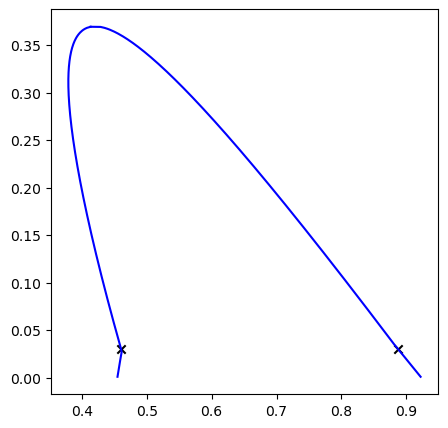

In [79]:
ax.scatter(ϕas_left[indl], ϕps[indl]; color = "black", marker = "x")
ax.scatter(ϕas_right[indr], ϕps[indr]; color = "black", marker = "x")
display(fig)

In [80]:
file_name = "/store/DAMTP/jm2386/Active_Lattice/data/pm_pdes_pro/spinodal/Δϕ=$(Δϕ)_Pe=$(Pe).jld2"
            data = Dict{String,Any}()
            @pack! data = ϕas_left, ϕas_right, ϕps, indl, indr
            safesave(file_name,data)
            println("saved: ","Δϕ=$(Δϕ)_Pe=$(Pe)")

saved: Δϕ=0.001_Pe=7.5
